<a href="https://colab.research.google.com/github/bhavithavelugoti/digibhem/blob/main/mental_fitness_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/IBM_2.csv')
df2=pd.read_csv('/content/drive/MyDrive/mental-and-substance-use-as-share-of-disease -AI.csv')

In [ ]:
df1.head()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [ ]:
df2.head(10)

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986
5,Afghanistan,AFG,1995,1.738272
6,Afghanistan,AFG,1996,1.778098
7,Afghanistan,AFG,1997,1.781815
8,Afghanistan,AFG,1998,1.729402
9,Afghanistan,AFG,1999,1.850988


In [ ]:
data=pd.merge(df1,df2)
data.head(10)

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
5,Afghanistan,AFG,1995,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422,1.738272
6,Afghanistan,AFG,1996,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837,1.778098
7,Afghanistan,AFG,1997,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938,1.781815
8,Afghanistan,AFG,1998,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665,1.729402
9,Afghanistan,AFG,1999,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428,1.850988


In [ ]:
data.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)                      0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (P

In [ ]:
data.drop('Code',axis=1,inplace=True)

In [ ]:
data.head(10)

,Entity,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
5,Afghanistan,1995,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422,1.738272
6,Afghanistan,1996,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837,1.778098
7,Afghanistan,1997,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938,1.781815
8,Afghanistan,1998,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665,1.729402
9,Afghanistan,1999,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428,1.850988


In [ ]:
data.size,data.shape

(68400, (6840, 10))

In [ ]:
data.set_axis(['Country','Year','Schizophrenia','Bipolar_disorder','Eating','Anxiety','Drug_use','depression','alcohol','mental_fitness'],axis='columns',inplace=True)

In [ ]:
data.head(10)

,Country,Year,Schizophrenia,Bipolar_disorder,Eating,Anxiety,Drug_use,depression,alcohol,mental_fitness
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
5,Afghanistan,1995,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422,1.738272
6,Afghanistan,1996,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837,1.778098
7,Afghanistan,1997,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938,1.781815
8,Afghanistan,1998,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665,1.729402
9,Afghanistan,1999,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428,1.850988


[]

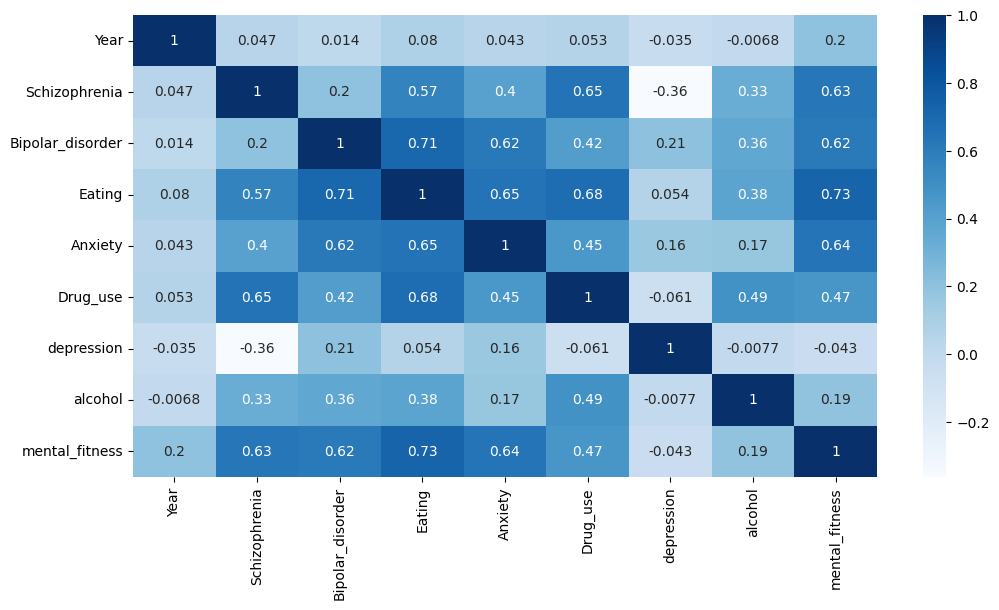

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.plot()

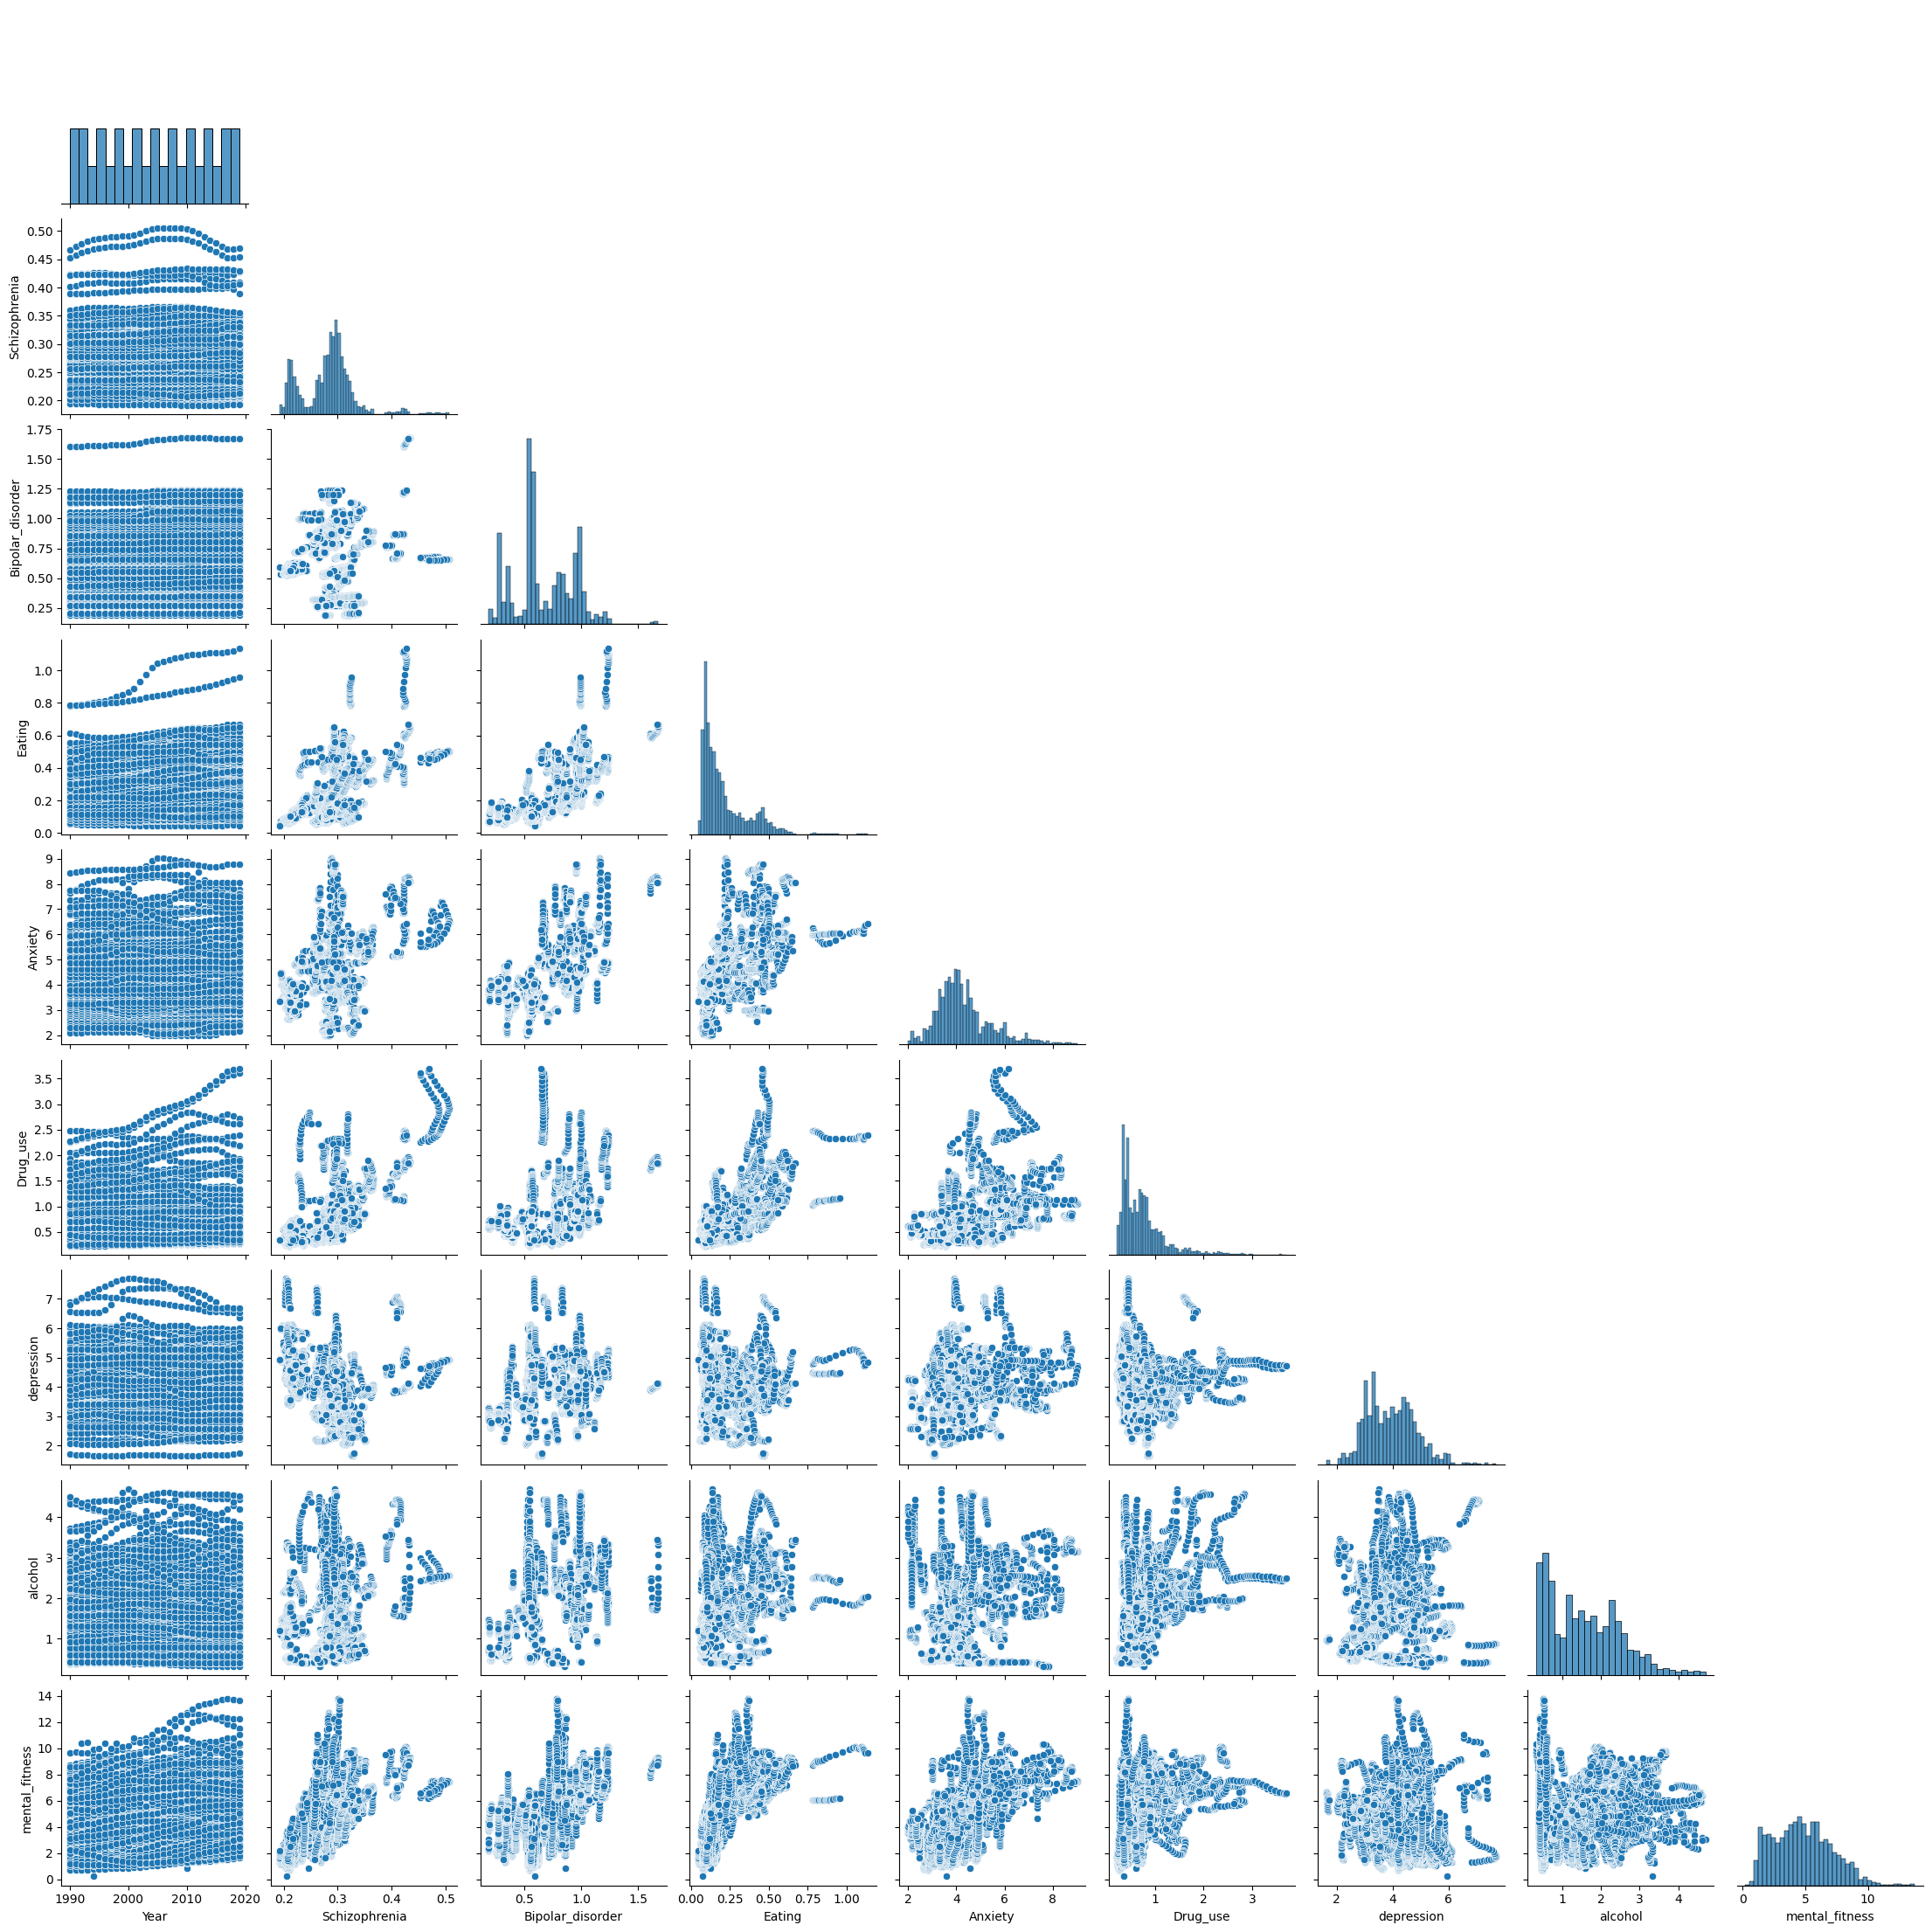

In [ ]:
sns.pairplot(data,corner=True)
plt.show()

In [ ]:
mean=data['mental_fitness'].mean()
mean

4.8180618117506135

In [ ]:
fig=px.pie(data,values='mental_fitness',names='Year')
fig.show()

In [ ]:
fig=px.line(data,x="Year",y="mental_fitness",color="Country",markers=True,color_discrete_sequence=['red','blue'],template='plotly_dark')
fig.show()

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           6840 non-null   int64  
 1   Year              6840 non-null   int64  
 2   Schizophrenia     6840 non-null   float64
 3   Bipolar_disorder  6840 non-null   float64
 4   Eating            6840 non-null   float64
 5   Anxiety           6840 non-null   float64
 6   Drug_use          6840 non-null   float64
 7   depression        6840 non-null   float64
 8   alcohol           6840 non-null   float64
 9   mental_fitness    6840 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 587.8 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
  if df[i].dtype == 'object':
    df[i]=l.fit_transform(df[i])

In [ ]:
df.shape

(6840, 10)

In [ ]:
x=df.drop('mental_fitness',axis=1)
y=df['mental_fitness']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=2)

In [ ]:
print("xtrain: ",xtrain.shape)
print("xtest: ",xtest.shape)
print("\n ytrain: ",ytrain.shape)
print("ytest: ",ytest.shape)

xtrain:  (5472, 9)
xtest:  (1368, 9)

 ytrain:  (5472,)
ytest:  (1368,)


In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lr=LinearRegression()
lr.fit(xtrain,ytrain)

ytrain_pred=lr.predict(xtrain)
mse=mean_squared_error(ytrain,ytrain_pred)
rmse=(np.sqrt(mean_squared_error(ytrain,ytrain_pred)))
r2=r2_score(ytrain,ytrain_pred)

print("The Linear Regression model performance for training set")
print("----------------------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The Linear Regression model performance for training set
----------------------------------------------------
MSE is 1.3899593724006116
RMSE is 1.178965382189236
R2 score is 0.7413245790034926


In [163]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)

ytrain_pred=rf.predict(xtrain)
mse=mean_squared_error(ytrain,ytrain_pred)
rmse=(np.sqrt(mean_squared_error(ytrain,ytrain_pred)))
r2=r2_score(ytrain,ytrain_pred)

print("The Random Forest Regressor model performance for training set")
print("----------------------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The Random Forest Regressor model performance for training set
----------------------------------------------------
MSE is 0.004787460210822927
RMSE is 0.06919147498661181
R2 score is 0.9991090399402107


In [164]:
ytest_pred=lr.predict(xtest)
mse=mean_squared_error(ytest,ytest_pred)
rmse=(np.sqrt(mean_squared_error(ytest,ytest_pred)))
r2=r2_score(ytest,ytest_pred)

print("The Linear Regression model performance for training set")
print("----------------------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

ytest_pred=rf.predict(xtest)
mse=mean_squared_error(ytest,ytest_pred)
rmse=(np.sqrt(mean_squared_error(ytest,ytest_pred)))
r2=r2_score(ytest,ytest_pred)

print("\n \nThe Random Forest Regressor model performance for training set")
print("----------------------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The Linear Regression model performance for training set
----------------------------------------------------
MSE is 1.1357545319963875
RMSE is 1.0657178482114238
R2 score is 0.7638974086911524

 
The Random Forest Regressor model performance for training set
----------------------------------------------------
MSE is 0.030067001003711
RMSE is 0.17339838812316277
R2 score is 0.9937496204946823
